# Artificial Neural Network

### 1. Libraries

In [79]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 2. Data Creation

In [78]:
def create_data(samples):
	points = []
	for i in range(samples):
		x = np.random.uniform(-5, 5)
		y = np.random.uniform(-5, 5)

		if -1 < x < 0:
			if y > math.sin(x) and y < x**2*math.sin(x):
				label = 0
			elif y < math.tan(x):
				label = 0
			elif y > math.log(x+7):
				label = 0
			else:
				label = 1

		if 0 < x < 1:
			if y < math.sin(x) and y > x**2*math.sin(x):
				label = 0
			elif y > math.tan(x) and y < math.log(x+7):
				label = 0
			else:
				label = 1

		if 1 < x < 2.858:
			if y > math.sin(x) and y < math.log(x+7):
				label = 0
			elif y > math.sin(x) and y > x**2*math.sin(x):
				label = 0
			elif y < math.tan(x):
				label = 0
			else:
				label = 1

		if -1 > x > -math.pi:
			if y < math.sin(x) and y > math.sin(x)*x**2:
				label=0
			elif y > math.tan(x) and y < math.log(x+7):
				label = 0
			else:
				label = 1

		if x > 2.858:
			if y > math.sin(x)*x**2 and y > math.tan(x) and y < math.log(x+7):
				label = 1
			else: 
				label = 0

		if x < -math.pi:
			if y > math.sin(x) and y < math.log(x+7) and y < math.sin(x)*x**2:
				label = 1
			elif y < math.tan(x):
				label = 1
			elif y > math.log(x+7) and y < math.sin(x):
				label = 1
			else:
				label = 0

		points.append([x,y,label])

	df = pd.DataFrame(np.array(points), columns=['x','y','color'])

	return df

In [80]:
df = create_data(50000 )

In [82]:
df.head()

,x,y,color
0,2.619468,0.797019,0.0
1,4.631066,-1.242989,0.0
2,-3.348813,1.064900,1.0
3,-3.477712,-0.627802,1.0
4,-4.628191,4.856989,0.0


In [83]:
df.color.value_counts()

0.0    28773
1.0    21227
Name: color, dtype: int64

* **Data Visualization**

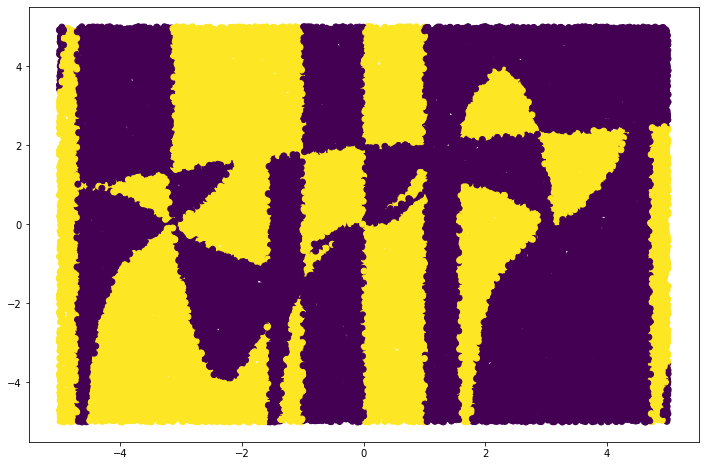

In [84]:
plt.figure(figsize=(12,8))
plt.scatter(df.x, df.y, c=df.color)
plt.show()

Our aim is to distinguish the classes

### 3. Prepare Data Input-Output

In [86]:
X = df[["x","y"]]
y=df["color"]

### 4. Train-Test Split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### 5. Model Creation (Neural Network)

In [88]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [96]:
#Model --> (2 inputs, 2 Hidden Layer, 32 nodes/hidden Layer, 2 output classes)

model = keras.Sequential([
    keras.layers.Dense(32,input_shape=(2,),activation="relu"),  
    keras.layers.Dense(32,activation="relu"), 
    keras.layers.Dense(32,activation="relu"), # 3.Hidden Layer
    keras.layers.Dense(2,activation="sigmoid")])

In [97]:
model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

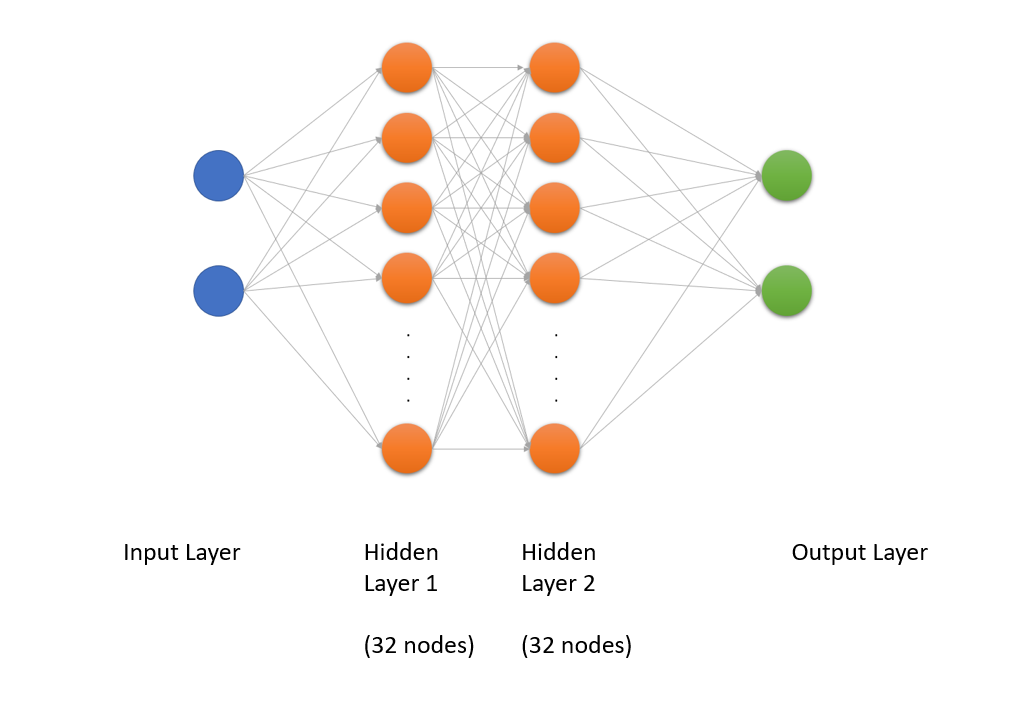

In [98]:
X_train.values[0:5]

array([[ 2.64486387, -2.45132474],
       [ 1.23114686,  2.91507865],
       [ 4.90359467,  0.19613367],
       [-3.61515977,  2.82822059],
       [-2.29688901,  2.36976527]])

In [99]:
y_train.values

array([0., 0., 1., ..., 1., 1., 1.])

In [100]:
model.fit( X_train  , y_train.values, batch_size=4, epochs=10)

Epoch 1/10


C:\Users\Cagdas\anaconda3\envs\ml\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8750/8750 [==============================] - 12s 1ms/step - loss: 0.5341 - accuracy: 0.7255
Epoch 2/10
8750/8750 [==============================] - 11s 1ms/step - loss: 0.3894 - accuracy: 0.8169
Epoch 3/10
8750/8750 [==============================] - 11s 1ms/step - loss: 0.2987 - accuracy: 0.8666
Epoch 4/10
8750/8750 [==============================] - 11s 1ms/step - loss: 0.2563 - accuracy: 0.8885
Epoch 5/10
8750/8750 [==============================] - 11s 1ms/step - loss: 0.2283 - accuracy: 0.8998
Epoch 6/10
8750/8750 [==============================] - 12s 1ms/step - loss: 0.2093 - accuracy: 0.9103
Epoch 7/10
8750/8750 [==============================] - 12s 1ms/step - loss: 0.1984 - accuracy: 0.9152
Epoch 8/10
8750/8750 [==============================] - 12s 1ms/step - loss: 0.1870 - accuracy: 0.9202
Epoch 9/10
8750/8750 [==============================] - 11s 1ms/step - loss: 0.1795 - accuracy: 0.9238
Epoch 10/10
8750/8750 [==============================] - 11s 1ms/step - loss: 0.1740

In [103]:
model_score = model.evaluate(X_test, y_test.values) 

469/469 [==============================] - 1s 1ms/step - loss: 0.1662 - accuracy: 0.9293


In [110]:
print("Model Accuracy Score : {:.2f}%".format(model_score[1]*100))

Model Accuracy Score : 92.93%


# Thanks!